# Proyecto Final - Rafa Rodriguez Vazquez - Deep Learning

**He seleccionado un dataset de la plataforma de kaggle. Este dataset, relacionado con condiciones atmosféricas (Weather), contiene 11 directorios con 700 imagenes cada uno; y un peso alrededor de 700 MB**

**link:** https://www.kaggle.com/datasets/tamimresearch/weather-detection-image-dataset?resource=download&select=dew
   
#### El desarrollo del contenido del código del proyecto contará con los siguientes pasos:

   - **1. Carga y comprobación de datos**
   - **2. Limpieza y preparación de datos**
   - **3. Visualizacion de datos**
   - **4. Definición y construcción del modelo de red neuronal**
   - **5. Entrenamiento del modelo de red neuronal**
   - **6. Evaluacion, guardado y carga del modelo y prueba de predicción**

## 1. Carga y comprobación de datos

In [1]:
# Realizamos las importaciones correspondientes para cargar nuestro archivo. En este caso:

import os        # importamos el modulo os para poder operar con los directorios desde jupyter directamente.
import zipfile   # importamos el modulo zipfile, para abrir y cargar los datos descargados de kaggle en un zip.

# Generamos un bucle que nos permita extraer los archivos de nuestro zip y en caso de que hayan sido extraidos, nos lo indique

local_zip='./archive.zip' # establecemos una variable que tendra en valor nuestro fichero zip

if not os.path.exists('./dew fogsmog frost glaze hail lightning rain rainbow rime sandstorm snow'):
    zip_ref = zipfile.ZipFile(local_zip, 'r')
    zip_ref.extractall('.')
    zip_ref.close()
    print("Archivos extraídos correctamente")
else:
    print("Los archivos ya han sido extraídos correctamente")

Archivos extraídos correctamente


In [2]:
# Para comprobar los datos que acabamos de extraer, vamos a establecer ruta a cada directorio y luego aplicaremos la funcion
# [len()] para contar el numero de ejemplos que tenemos, al transformar en una lista nuestros datos

# Rutas a cada directorio
dew = os.path.join('dew')
fogsmog = os.path.join('fogsmog')
frost = os.path.join('frost')
glaze = os.path.join('glaze')
hail = os.path.join('hail')
lightning = os.path.join('lightning')
rain = os.path.join('rain')
rainbow = os.path.join('rainbow')
rime = os.path.join('rime')
sandstorm = os.path.join('sandstorm')
snow = os.path.join('snow')

# Transformamos en una lista
dew_list = os.listdir(dew)
fogsmog_list = os.listdir(fogsmog)
frost_list = os.listdir(frost)
glaze_list = os.listdir(glaze)
hail_list = os.listdir(hail)
lightning_list = os.listdir(lightning)
rain_list = os.listdir(rain)
rainbow_list = os.listdir(rainbow)
rime_list = os.listdir(rime)
sandstorm_list = os.listdir(sandstorm)
snow_list = os.listdir(snow)

# Ordenamos la lista
dew_list.sort()
fogsmog_list.sort()
frost_list.sort()
glaze_list.sort()
hail_list.sort()
lightning_list.sort()
rain_list.sort()
rainbow_list.sort()
rime_list.sort()
sandstorm_list.sort()
snow_list.sort()

# Mostramos la informacion de nuestros datos
print(
    "Nº de ejemplos según directorio:\n" 
    "-dew:",len(dew_list),
    "\n-fogsmog:",len(fogsmog_list),
    "\n-frost:",len(frost_list),
    "\n-glaze:",len(glaze_list),
    "\n-hail:",len(hail_list),
    "\n-lightning:",len(lightning_list),
    "\n-rain:",len(rain_list),
    "\n-rainbow:",len(rainbow_list),
    "\n-rime:",len(rime_list),
    "\n-sandstorm:",len(sandstorm_list),
    "\n-snow:",len(snow_list)
     )

Nº de ejemplos según directorio:
-dew: 700 
-fogsmog: 700 
-frost: 700 
-glaze: 700 
-hail: 700 
-lightning: 700 
-rain: 700 
-rainbow: 700 
-rime: 700 
-sandstorm: 700 
-snow: 700


**Tras este primer contacto con los datos, podemos comprobar que cada uno esta dividido en 700 imagenes. Lo que nos indica que el dataset está equilibrado.**

Tenemos un dataset equilibrado donde cada atributo debe entenderse como:
   - Dew : Gotas de rocio
   - Fogsmog (Fog \ Smog) : Niebla
   - Frost : Escarcha
   - Glaze : Revestimiento de escarcha (solo en la superficie)
   - Hail : Granizo
   - Lightning : Relámpago
   - Rain : lluvia
   - Rainbow : Arcoiris
   - Rime : Escarcha
   - Sandstorm : Tormenta de arena
   - Snow : Nieve

Concluido este proceso, tenemos un primer vistazo de nuestros datos y un poco más de conocimiento sobre el mismo.

## 2. Limpieza y preparación de datos

In [3]:
# Para continuar con el desarrollo de nuestro proyecto vamos a hacer una limpieza sobre algunos datos que representan 
# una simmilitud casi exacta, y otros que no aportan un valor real al proyecto, como es el caso de los directorios: 
# [GLaze , Rime, Rainbow]. Glaze y rime por ser parecidos a frost y rainbow por no tener mucha relevancia en la predicción

import shutil # este modulo nos ayudará gracias a su facilidad de manipulacion de directorios

# Establecemos variables que nos son de interés para el proceso de eliminar las carpetas
dir_eliminar = [glaze, rainbow, rime]
ruta_base = './'

# Generamos un bucle anidado que nos eliminará los directorios incluidos en dir_eliminar
for directorio in dir_eliminar:
    ruta_dir = os.path.join(ruta_base, directorio)
    
    if os.path.exists(ruta_dir):
        shutil.rmtree(ruta_dir)
        print("Direcorio/s eliminados correctamente")
    else:
        print("Directorio/s a eliminar no existentes")
        

        
# Nuestros datos estan preparados ahora para realizar correctamente la division de los conjuntos de train, validation y test.

Direcorio/s eliminados correctamente
Direcorio/s eliminados correctamente
Direcorio/s eliminados correctamente


**Tenemos un total de 700 imagenes en cada directorio he considerado correcto que la division se produzca en:**
   - train: 500 (70% del total)
   - validation: 100 (15 % del total)
   - test: 100 (15% del total)

In [4]:
# Para establecer nuestra division de conjuntos (train, validation, test) vamos a crear una variable nueva para cada conjunto,
# donde vamos a realizar un slicing sobre la variable [(directorio)_list] establecida en celdas más arriba, 
# con el numero de ejemplos que hemos considerado correcto: [train - 500; validation - 100; test - 100]

# directorio dew:
train_dew = dew_list[:500]
val_dew = dew_list[500:600]
test_dew = dew_list[600:700]

# directorio fogsmog:
train_fogsmog = fogsmog_list[:500]
val_fogsmog = fogsmog_list[500:600]
test_fogsmog = fogsmog_list[600:700]

# directorio frost:
train_frost = frost_list[:500]
val_frost = frost_list[500:600]
test_frost = frost_list[600:700]

# directorio hail:
train_hail = hail_list[:500]
val_hail = hail_list[500:600]
test_hail = hail_list[600:700]

# directorio lightning:
train_lightning = lightning_list[:500]
val_lightning = lightning_list[500:600]
test_lightning = lightning_list[600:700]

# directorio rain:
train_rain = rain_list[:500]
val_rain = rain_list[500:600]
test_rain = rain_list[600:700]

# directorio sandstorm:
train_sandstorm = sandstorm_list[:500]
val_sandstorm = sandstorm_list[500:600]
test_sandstorm = sandstorm_list[600:700]

# directorio snow:
train_snow = snow_list[:500]
val_snow = snow_list[500:600]
test_snow = snow_list[600:700]

print(f"Nº de ejemplos en train:\ndew: {len(train_dew)} ~ fogsmog: {len(train_fogsmog)} ~ frost: {len(train_frost)} ~ hail:{len(train_hail)} ~ lightning: {len(train_lightning)} ~ rain: {len(train_rain)} ~ sandstorm: {len(train_sandstorm)} ~ snow: {len(train_snow)}")
print(f"\nNºde ejemplos en validation:\ndew: {len(val_dew)} ~ fogsmog: {len(val_fogsmog)} ~ frost: {len(val_frost)} ~ hail:{len(val_hail)} ~ lightning: {len(val_lightning)} ~ rain: {len(val_rain)} ~ sandstorm: {len(val_sandstorm)} ~ snow: {len(val_snow)}")
print(f"\nNºde ejemplos en test:\ndew: {len(test_dew)} ~ fogsmog: {len(test_fogsmog)} ~ frost: {len(test_frost)} ~ hail:{len(test_hail)} ~ lightning: {len(test_lightning)} ~ rain: {len(test_rain)} ~ sandstorm: {len(test_sandstorm)} ~ snow: {len(test_snow)}")

Nº de ejemplos en train:
dew: 500 ~ fogsmog: 500 ~ frost: 500 ~ hail:500 ~ lightning: 500 ~ rain: 500 ~ sandstorm: 500 ~ snow: 500

Nºde ejemplos en validation:
dew: 100 ~ fogsmog: 100 ~ frost: 100 ~ hail:100 ~ lightning: 100 ~ rain: 100 ~ sandstorm: 100 ~ snow: 100

Nºde ejemplos en test:
dew: 100 ~ fogsmog: 100 ~ frost: 100 ~ hail:100 ~ lightning: 100 ~ rain: 100 ~ sandstorm: 100 ~ snow: 100


In [5]:
# Una vez divididos nuestros conjuntos vamos a crear los directorios de train, validation y test con los ejemplos divdidos

# creamos rutas hacia nuestros directorios
source = './'
train_dir = './train'
validation_dir = './validation'
test_dir = './test'

# creamos las carpetas de train, validation y test
if not os.path.exists(train_dir) or not os.path.exists(validation_dir) or not os.path.exists(test_dir):
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(validation_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)
    print("Carpetas creadas correctamente")
else:
    print("Las carpetas ya se encuentran creadas")
    
# definimos nuestras etiquetas    
categorias = ['dew', 'fogsmog', 'frost', 'hail', 'lightning', 'rain', 'sandstorm', 'snow' ]

for categoria in categorias:
# creamos subcarpetas en train, validation y test para cada clase
    train_categoria = os.path.join(train_dir, categoria)
    validation_categoria = os.path.join(validation_dir, categoria)
    test_categoria = os.path.join(test_dir, categoria)

    for directory in [train_categoria, validation_categoria, test_categoria]:
        os.makedirs(directory, exist_ok=True)

# movemos las imágenes de la clase a las subcarpetas correspondientes en las carpetas de train, validation y test
    for i, split in enumerate(['train', 'val', 'test']):
        fnames = globals()[f'{split}_{categoria}']
        dst = os.path.join([train_categoria, validation_categoria, test_categoria][i])

        for fname in fnames:
            src = os.path.join(source, categoria, fname)
            shutil.copyfile(src, os.path.join(dst, fname))

Las carpetas ya se encuentran creadas


**En este punto del desarrollo de nuestro proyecto, ya tenemos creadas los directorios con sus correspondientes atributos y los conjuntos de datos divididos correctamente y añadidos a los directorios de train, validation y test.**

## 3. Visualización de datos

Antes de continuar con el establecimiento del modelo, vamos a comprobar visualmente nuestros datos para ver con los datos que tratamos y como se representan.

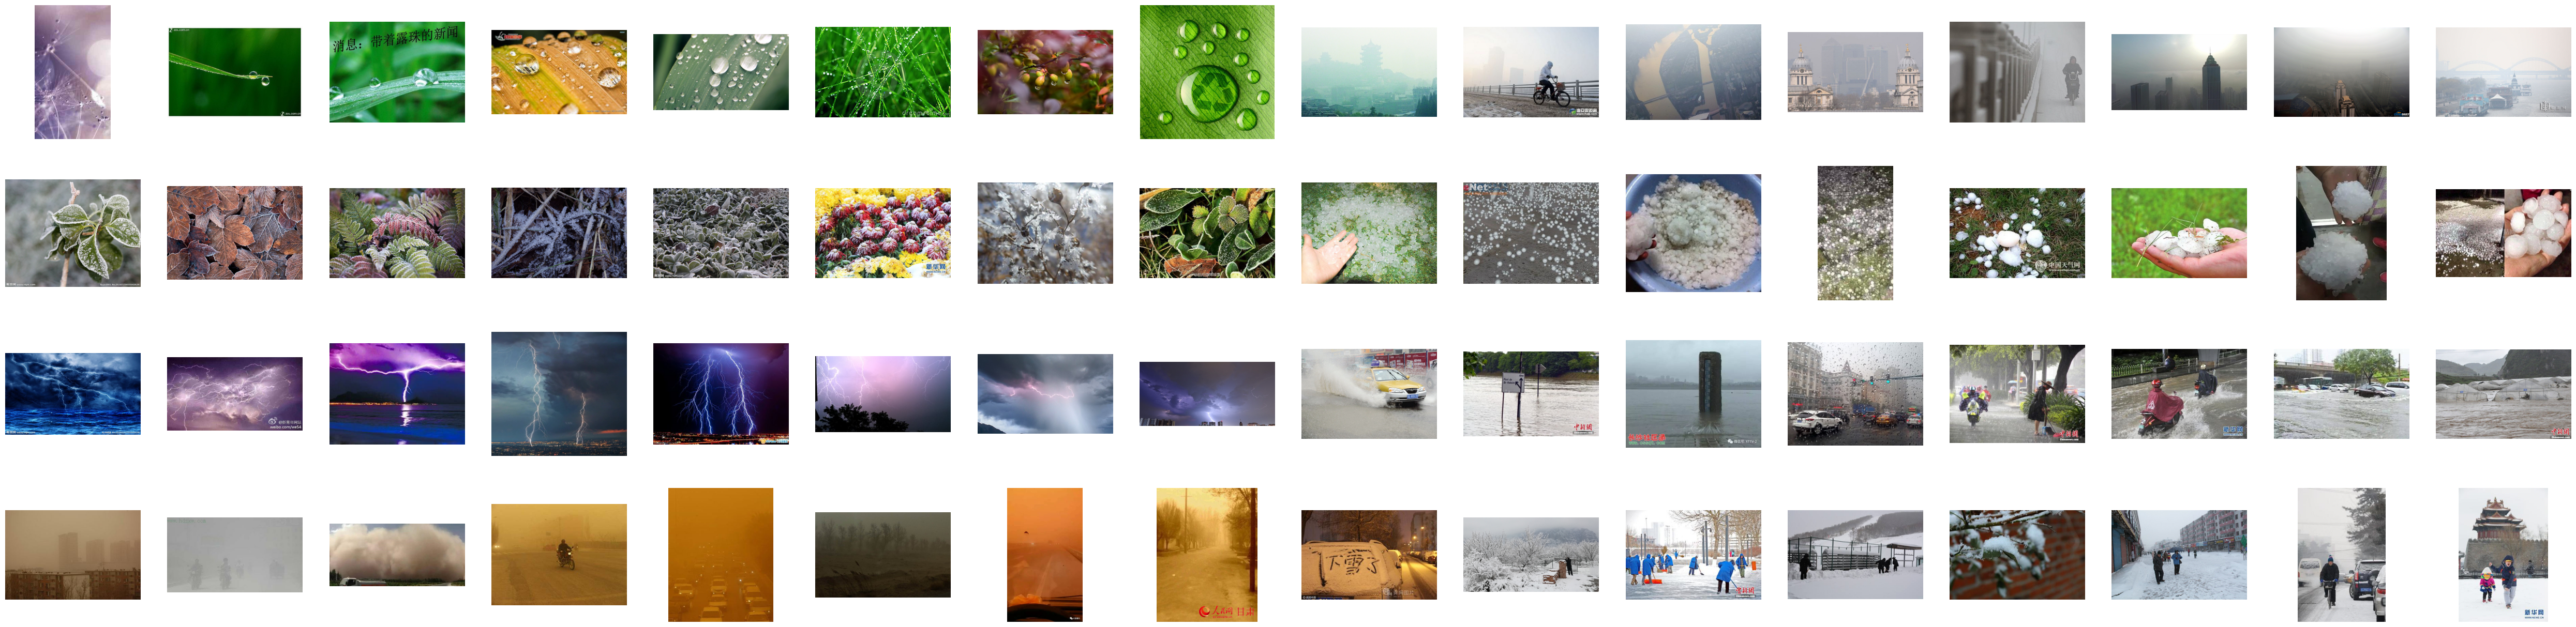

In [6]:
# La visualizacion de los datos vamos a realizarla sobre el conjunto de entrenamiento
# Para ello vamos a instalar dos librerias de visualizacion:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# parámetros utilizados en nuestro gráfico (cantidad de muestras)
nrows = 16
ncols = 16

# indice para generar la iteracion sobre imagenes
pic_index = 0

# Configuracion de la libreria matplotlib para que represente en una configuracion de 4x4.
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 32
next_dew_pix = [os.path.join(dew, fname) 
                for fname in train_dew[pic_index-8:pic_index]]
next_fogsmog_pix = [os.path.join(fogsmog, fname) 
                for fname in train_fogsmog[pic_index-8:pic_index]]
next_frost_pix = [os.path.join(frost, fname) 
                for fname in train_frost[pic_index-8:pic_index]]
next_hail_pix = [os.path.join(hail, fname) 
                for fname in train_hail[pic_index-8:pic_index]]
next_lightning_pix = [os.path.join(lightning, fname) 
                for fname in train_lightning[pic_index-8:pic_index]]
next_rain_pix = [os.path.join(rain, fname) 
                for fname in train_rain[pic_index-8:pic_index]]
next_sandstorm_pix = [os.path.join(sandstorm, fname) 
                for fname in train_sandstorm[pic_index-8:pic_index]]
next_snow_pix = [os.path.join(snow, fname) 
                for fname in train_snow[pic_index-8:pic_index]]


for i, img_path in enumerate(next_dew_pix+next_fogsmog_pix+next_frost_pix+next_hail_pix+
                             next_lightning_pix+next_rain_pix+next_sandstorm_pix+next_snow_pix):
    
  # configuramos apra que los indices del subplot empiecen en 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') 

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## 4. Definición y construcción del modelo de red neuronal

Una vez que tenemos todos los datos preprocesados y listos para ser utilizados, continuamos con la construccion de nuestro modelo.

Vamos a generar un modelo de red neuronal convolucional, que nos permita extraer todas las características de nuestras imagenes y aprenda a clasificarlas correctamente. Para tal fin vamos a establecer los siguientes criterios en la red (iniciales):

   -  Vamos a tener un valor de entrada, en pixeles de imagen, de 150x150 (input_size), junto con 3 colores de entrada (rgb) ya que nuestras imágenes estan en color.
   - Añadiremos 4 capas de convolucion junto con 4 capas de pooling, para extraer las máximas características por imágen.
   - Añadiremos una capa de regularización (dropout) para evitar el sobreajuste, con un valor inicial de (0.25).
   - Seguidamente una capa de aplanamiento (Flatten), para transformar nuestras características establecidas en matrices de tensores, en un vector unitario con toda esta informacion, para que nuestro modelo aprenda mejor.
   - Continuaremos con una capa de neuronas densa (Dense) con un numero de neuronas inicial de 500.
   - Para finalizar tendremos una capa densa (Dense) de salida con 8 neuronas, ya que nuestras clases a predecir son 8.
   - Para las capas de convolución y la capa densa utilizaremos una función de activación Relu, con el fin de reducir el coste computacional y evitar el desvanecimiento de gradiente.  
   - Para la capa densa de salida una activacion Softmax, con tal de obtener una distribución probabilistica sobre que clase es más probable que predigamos y acertemos.
   
A la hora en que compilemos el modelo, tendremos:

   - Una función de perdida (loss) = categorical_crossentropy; ya que al predecir más de una clase, nos permite identificar que dato corresponde a una determinada clase dentro del conjunto.
   - Un optimizador Adam con un learning rate inicial de (0.001), para controlar el ajuste de los pesos.
   - Y utilizaremos como metrica la exactitud (accuracy).

**Pd: estos criterios pueden ir variando segun probemos el entrenamiento del modelo hasta alcanzar el valor óptimo.**

Pero antes de comenzar con el proceso de modelaje, vamos a aplicar un proceso de augmentación de datos sobre nuestros conjuntos de datos, para aumentar la cantidad y variabilidad de los datos que disponemos de cara a cuando entrenar nuestro modelo.

### Augmentación de datos

In [7]:
# Importamos el modulo ImageDataGenerator desde las dependencias de tensorflow

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# comenzamos la augmentación para los conjuntos de train, validation y test

# train
train_datagen = ImageDataGenerator(
    rescale = 1./255,        # escalamos el valor del pixel entre 0 y 1
    rotation_range = 30,     # le damos un angulo de rotacion a cada imagen de 30º
    width_shift_range=0.2,   # desplazamos aleatoriamente las imagenes un 20% horizontalmente
    height_shift_range=0.2,  # desplazamos aleatoriamente las imagenes un 20% verticalmente
    shear_range=0.2,         # aplicamos cizallamiento en las imagenes
    zoom_range=0.2,          # aplicamos zoom en las imagenes
    horizontal_flip=True,    # volteamos aleatoriamente las imagenes horizontalmente (de derecha a izquierda y viceversa)
    fill_mode='nearest'      # rellena pixeles nuevos creados tras la aplicacion de rotaciones y otros.
)

# validation
val_datagen = ImageDataGenerator(
    rescale = 1./255
)

# test
test_datagen = ImageDataGenerator(
    rescale = 1./255
)

# para continuar con el proceso de augmentacion de datos, vamos a crear nuestros generadores de imagen utilizando los directorios
# creados en el proceso de transformacion de los datos en celdas anteriores 

train_generator = train_datagen.flow_from_directory(
    train_dir,               # directorio train creado anteriormente
    target_size = (150,150), # redimension de imagenes de entrada a 150x150 pixeles
    batch_size = 100,         # nº de imagenes que se cargaran y procesaran 
    color_mode='rgb',        # modo de color de las imagenes
    class_mode='categorical' # tipo de etiquetas que se generaran, en este caso en formato one-hot con valores (0 ó 1)
)

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 100, 
    color_mode='rgb',
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150,150),
    batch_size = 100, 
    color_mode='rgb',
    class_mode='categorical'
)

# Con esto finalizaria el proceso de augmentación de datos y estamos preparados para comezar con nuestro modelo


Found 3999 images belonging to 8 classes.
Found 800 images belonging to 8 classes.
Found 800 images belonging to 8 classes.


### Modelo de red neuronal Convolucional (CNN)

In [18]:
# Comenzamos con nuestro modelo importando las librerias correspondientes, tensorflow y keras

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dropout  # importacion para la capa de regularización

# definimos los datos de entrada y construimos nuestras capas del modelo

input_size = 150  # tamaño de pixeles por imagen
n_colors = 3      # colores de rgb (red, green, blue)

layers = [
    keras.layers.Input(shape=(input_size, input_size, n_colors)), # capa entrada
    keras.layers.Conv2D(16, (3,3), activation = 'relu'), # capa de convolución con 16 filtros de tamaño 3x3 y funcion de act. relu
    keras.layers.MaxPool2D(2,2), # capa de pooling tamaño 2x2 con un stride de 1 incluido por defecto
    keras.layers.Conv2D(32, (3,3), activation = 'relu'), # capa de convolucion con 32 filtros
    keras.layers.MaxPool2D(2,2),
    keras.layers.Conv2D(64, (3,3), activation = 'relu'), # capa de convolucion con 64 filtros
    keras.layers.MaxPool2D(2,2),
    keras.layers.Conv2D(128, (3,3), activation = 'relu'), # capa de convolucion con 128 filtros
    keras.layers.MaxPool2D(2,2),
    Dropout(0.3), # capa de regularizacion al 30%
    keras.layers.Flatten(), # capa de aplanamiento, transformamos en vector los datos
    keras.layers.Dense(700, activation = 'relu'), # capa de neuronas densa/oculta y funcion de activacion relu.
    keras.layers.Dense(8, activation = 'softmax') # capa de salida con 8 neuronas (1 por cada clase) y funcion de act. relu
]

# establecemos modelo secuencial, según las capas generadas anteriormente

model = keras.Sequential(layers, name = "Modelo_CNN_Proyecto_Final")
                         
# compilamos el modelo creado, estableciendo el optimizador segun indicamos en la descripcion

optimizer = keras.optimizers.Adam(learning_rate=0.001)
                         
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = optimizer,
    metrics = ['accuracy']
)

# Vemos la informacion de nuestro modelo CNN generado
model.summary()

Model: "Modelo_CNN_Proyecto_Final"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 74, 74, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 17, 1

**Ya tenemos nuestro modelo definido y construido.** 

Comprobamos en la información general presentada con [.summary()] que nuestro modelo tiene un total de más de 3 millones de parámetros entrenables. Ahora continuaremos con el entrenamiento y podremos comprobar cual es su exactitud a la hora de entrenar.

## 5. Entrenamiento del modelo de red neuronal

Para el entrenamiento de nuestra red neuronal convolucional vamos a relacionar el modelo entrenado a una variable que llamaremos **history**.

Dentro de history encontraremos los siguientes apartados:

   - train_generator, es el generador de imagen para los datos de entrenamiento creado en apartados anteriores.
   - steps per epoch, que hace referencia a la cantidad de pasos opcionales que se extraeran en cada epoch. Establecemos 125 pasos por epoca.
   - epochs, nº de veces que el modelo recorrerá los datos. En este caso comenzaremos con 20 epocas en un inicio.
   - validation data, será el conjunto de datos que dividimos para realizar la validacion.
   - validation steps, hace referencia a la cantidad de pasos opcionales que se extraeran en cada paso de los datos de validacion. Empezaremos con 3 pasos por validacion.
   - verbose, para controlar la cantidad de informacion mostrada en el entrenamiento.

In [23]:
# Establecemos los parametros para el entrenamiento de nuestro modelo

history = model.fit(
    train_generator,
    steps_per_epoch = 40,     # calculado al dividir nº de datos(train=4000) entre el batch_size
    epochs = 30,              # tendremos 30 repasos al conjunto de datos
    validation_data = val_generator,
    validation_steps = 4,    # calculado al dividir el nº de datos (validation=100) entre el batch size
    verbose = 2              # con verbose = 2 obtenemos informacion de los datos importantes del entrenamiento
)

Epoch 1/30
40/40 - 54s - loss: 0.5044 - accuracy: 0.8232 - val_loss: 0.8968 - val_accuracy: 0.7525 - 54s/epoch - 1s/step
Epoch 2/30
40/40 - 54s - loss: 0.5048 - accuracy: 0.8240 - val_loss: 1.0190 - val_accuracy: 0.7025 - 54s/epoch - 1s/step
Epoch 3/30
40/40 - 54s - loss: 0.4988 - accuracy: 0.8235 - val_loss: 0.8731 - val_accuracy: 0.7100 - 54s/epoch - 1s/step
Epoch 4/30
40/40 - 54s - loss: 0.4912 - accuracy: 0.8270 - val_loss: 0.8191 - val_accuracy: 0.7325 - 54s/epoch - 1s/step
Epoch 5/30
40/40 - 54s - loss: 0.4904 - accuracy: 0.8262 - val_loss: 0.8626 - val_accuracy: 0.7150 - 54s/epoch - 1s/step
Epoch 6/30
40/40 - 54s - loss: 0.4824 - accuracy: 0.8302 - val_loss: 0.8808 - val_accuracy: 0.7050 - 54s/epoch - 1s/step
Epoch 7/30
40/40 - 54s - loss: 0.5055 - accuracy: 0.8205 - val_loss: 0.8438 - val_accuracy: 0.7300 - 54s/epoch - 1s/step
Epoch 8/30
40/40 - 55s - loss: 0.4900 - accuracy: 0.8290 - val_loss: 0.9351 - val_accuracy: 0.7075 - 55s/epoch - 1s/step
Epoch 9/30
40/40 - 53s - loss: 0

**Ya tenemos nuestro modelo entrenado y con una tasa de acierto del 88% en el conjunto de entrenamiento y del 70% en el conjunto de validacion.**


## 6. Evaluación, guardado y carga de modelo y predicción

Tras esto, nuestro modelo está listo y completado. 
Ahora procederemos a realizar los siguientes pasos:
   - Evaluación del modelo con el conjunto de datos de test.
   - Guardado del modelo en formato h5.
   - Carga del modelo y predicción del mismo

In [25]:
# Para evaluar nuestro modelo utilizaremos la función [.evaluate()] sobre el conjunto de test

loss, accuracy = model.evaluate(test_generator)

# Mostramos la perdida y la tasa de acierto con nuestros datos de test
print(f"\nPerdida en la evaluación en el conjunto de prueba {loss}")
print(f"\nTasa de acierto en la evaluación del conjunto de prueba {accuracy}")

8/8 [==============================] - 8s 1s/step - loss: 1.0795 - accuracy: 0.7138

Perdida en la evaluación en el conjunto de prueba 1.0795360803604126

Tasa de acierto en la evaluación del conjunto de prueba 0.7137500047683716


**Obtenemos una perdida mayor que en nuestro conjunto de entrenamiento y a su vez, una menor tasa de acierto pero que supera el 70%**

In [27]:
# Para guardar nuestro modelo utilizamos la funcion de keras [.save()]

model.save("proyecto_final_cnn.h5")

**LLegados a este punto, ya tendríamos nuestro modelo listo y preparado para realizar las predicciones dentro de nuestra API REST.**

Lo que vamos a hacer a continuación es una prueba, para comprobar que podemos cargar el modelo y realizar una predicción correctamente.

In [28]:
# cargamos el modelo con la función de keras [.load_model()], y lo guardamos en una variable llamada proyect

proyect = keras.models.load_model("proyecto_final_cnn.h5")

In [31]:
# Establecemos una predicción de sobre el primer valor del conjunto -> index = 0, para ello primero vamos a obtener
# las etiquetas reales del conjunto de datos y de este modo comparar para ver si la predicción acertó

index = 500 # el valor de la muestra que usare de ejemplo, en este caso hay 800 muestras y elijo la nº 500 aleatoriamente

true_labels = test_generator.classes

# Realizamos la prediccion

predictions = proyect.predict(test_generator)

print("\nValor realizado por la predicción en concepto probabilístico:\n", [round(prob, 4) for prob in predictions[index]])
print("\nValor Real:", true_labels[index])

8/8 [==============================] - 8s 991ms/step

Valor realizado por la predicción en concepto probabilístico:
 [0.0014, 0.7929, 0.0492, 0.0, 0.0998, 0.0396, 0.0156, 0.0013]

Valor Real: 5


Como podemos ver hemos guardado nuestro modelo y lo hemos cargado correctamente en una variable llamada project.

Luego hemos establecido una predicción, analizandola obtenemos que:

Para la muestra (500) del conjunto de test, el valor probabilistico generado por la prediccion de nuestro modelo es:

[0.0014 ~ 0.7929 ~ 0.0492 ~ 0.0 ~ 0.0998 ~ 0.0396 ~ 0.0156 ~ 0.0013] 

donde las clases se represetan con:

[      0 ~         1    ~     2     ~    3       ~   4     ~     5    ~      6     ~     7    ]

esto hace referencia a las 8 clases en las que se dividieron nuestros datos:
  - 0 = dew
  - 1 = fogsmog
  - 2 = frost
  - 3 = hail
  - 4 = lightning
  - 5 = rain
  - 6 = sandstorm
  - 7 = snow

Para este caso concreto nuestra etiqueta real es **5 que sería rain** y en la predicción ejercida indica que con mayor probabilidad (79%) es la **clase 2 que sería fog/smog**, para este caso nuestra predicción no acertó.

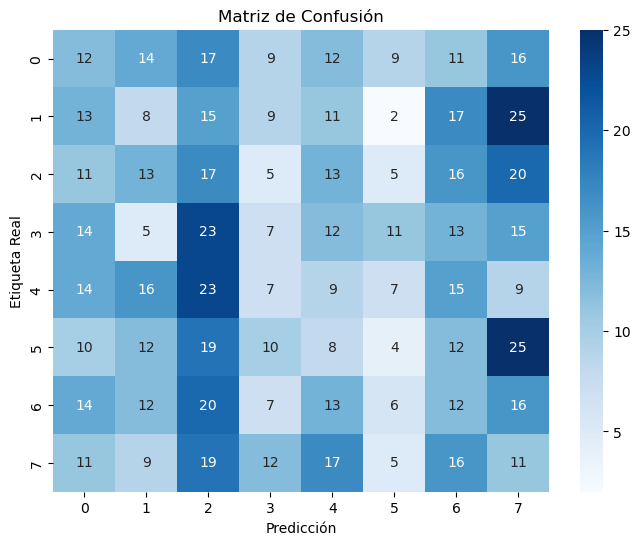

In [32]:
# Para finalizar vamos a ver representado en un mapa de calor la matriz de confusion con las predicciones:

# importamos la matriz de confusion
from sklearn.metrics import confusion_matrix as cm

# calculamos la matriz de confusión
confusion_matrix = cm(true_labels, predictions.argmax(axis=1))

# Generamos el gráfico
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión')
plt.show()
